### Important Libraries

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import math
import squarify
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [249]:
df=pd.read_csv('Processed_Flipdata - Processed_Flipdata.csv')

In [250]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [251]:
df.shape

(541, 12)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [253]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,541.0,289.711645,182.359185,0.0,135.00,273.00,434.00,642.00
Memory,541.0,110.550832,60.600694,16.0,64.00,128.00,128.00,256.00
RAM,541.0,5.397412,1.984923,2.0,4.00,6.00,8.00,8.00
Battery_,541.0,4871.587800,780.148862,800.0,5000.00,5000.00,5000.00,7000.00
AI Lens,541.0,0.062847,0.242911,0.0,0.00,0.00,0.00,1.00
Mobile Height,541.0,16.431201,2.523553,4.5,16.51,16.71,16.94,41.94


In [254]:
df.describe(exclude=['number']).T
# Exclude numerical column and summarize the categorical column. 

,count,unique,top,freq
Model,541,187,vivo Y16,9
Colour,541,275,Yellow,12
Rear Camera,541,14,50MP,260
Front Camera,541,13,16MP,164
Processor_,541,123,Qualcomm Snapdragon 680,33
Prize,541,158,"15,999",23


In [255]:
df.nunique()

Unnamed: 0       541
Model            187
Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Prize            158
dtype: int64

In [256]:
df.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

### Checking Null Values

In [258]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [259]:
print(df.isna().sum())

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [260]:
missing_rows = df[df['Prize'].isna()]
print(missing_rows)

Empty DataFrame
Columns: [Unnamed: 0, Model, Colour, Memory, RAM, Battery_, Rear Camera, Front Camera, AI Lens, Mobile Height, Processor_, Prize]
Index: []


In [261]:
df['Prize'] = df['Prize'].astype(str).str.replace(',', '').astype(float).astype('Int64')

In [262]:
df['Prize'] = df['Prize'].fillna(df['Prize'].median())  # Use median price

In [263]:
df.isna().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [264]:
float_cols = ['Memory', 'RAM', 'Battery_', 'Mobile Height','Prize']
df[float_cols] = df[float_cols].astype(int)

In [265]:
df.dtypes

Unnamed: 0        int64
Model            object
Colour           object
Memory            int32
RAM               int32
Battery_          int32
Rear Camera      object
Front Camera     object
AI Lens           int64
Mobile Height     int32
Processor_       object
Prize             int32
dtype: object

### Drop the unnamed column

In [267]:
df=df.copy()

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)

# Verify
print(df.head())

             Model        Colour  Memory  RAM  Battery_ Rear Camera  \
0  Infinix SMART 7   Night Black      64    4      6000        13MP   
1  Infinix SMART 7    Azure Blue      64    4      6000        13MP   
2     MOTOROLA G32  Mineral Gray     128    8      5000        50MP   
3         POCO C50    Royal Blue      32    2      5000         8MP   
4  Infinix HOT 30i      Marigold     128    8      5000        50MP   

  Front Camera  AI Lens  Mobile Height                  Processor_  Prize  
0          5MP        1             16  Unisoc Spreadtrum SC9863A1   7299  
1          5MP        1             16  Unisoc Spreadtrum SC9863A1   7299  
2         16MP        0             16     Qualcomm Snapdragon 680  11999  
3          5MP        0             16          Mediatek Helio A22   5649  
4          5MP        1             16                         G37   8999  


In [268]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16,"Exynos 1380, Octa Core",38999


# EDA

## Dividing Columns into 
##### 1. **Numerical Columns**
##### 2. **Categorical Columns**

## 1. Numerical Column

In [272]:
numerical_column=df.select_dtypes(include=['int']).columns
numerical_column

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize'], dtype='object')

<Axes: ylabel='count'>

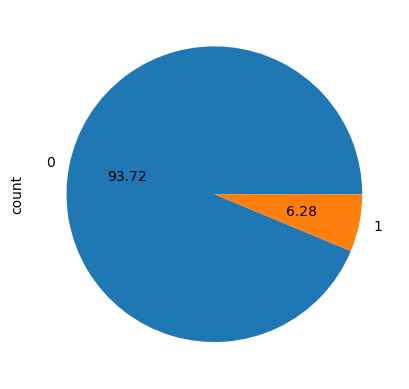

In [273]:
df['AI Lens'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

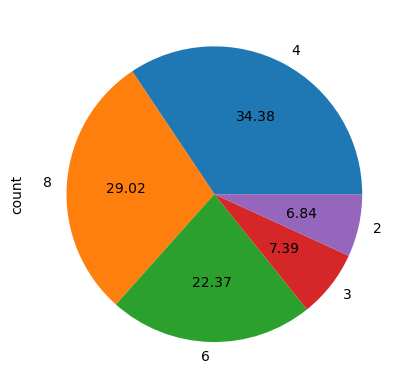

In [274]:
df['RAM'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

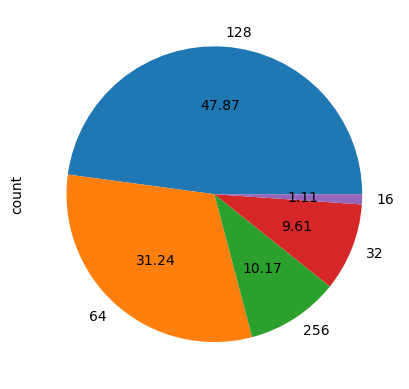

In [275]:
df['Memory'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Battery_'>

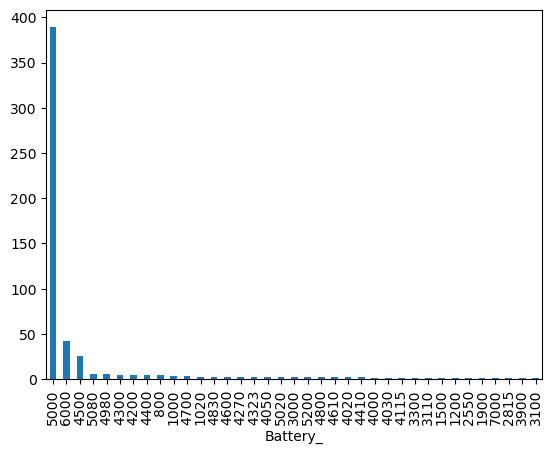

In [276]:
df['Battery_'].value_counts().plot(kind='bar')

In [277]:
print("The numerical columns:", len(numerical_column))

The numerical columns: 6


### Numerical columns are divided into
#### 1.**Discrete**
#### 2.**Continuous**

In [279]:
#numerical_column = df.select_dtypes(include=['float64', 'int64']).columns
#print("The Discrete feature Count:", len(discrete_feature))

In [280]:
#numerical_column = df1.select_dtypes(include=['float64', 'int64']).columns
#print("Continuous feature Count:", len(continuous_feature))

## 2.Categorical Column

In [282]:
categorical_column= df.select_dtypes(include=['object','float64'])
categorical_column

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


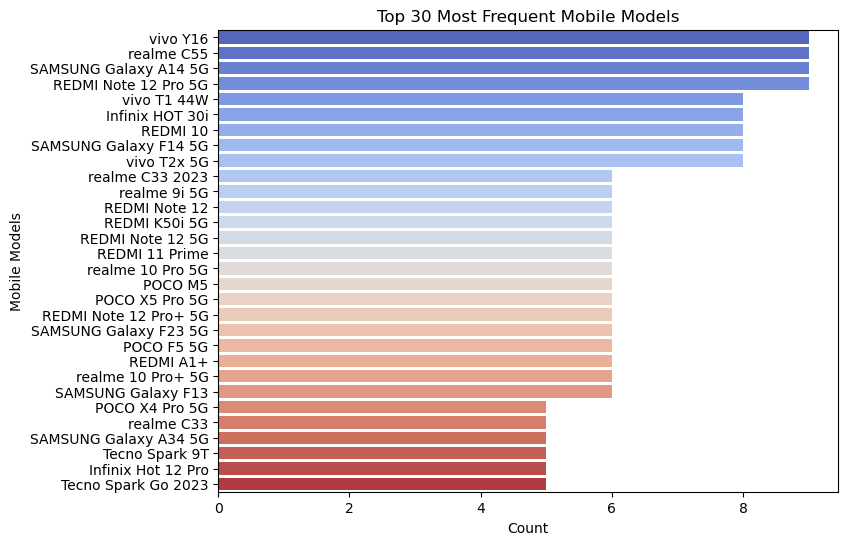

In [283]:
top_models = df["Model"].value_counts().nlargest(30)
plt.figure(figsize=(8, 6)) 
sns.barplot(y=top_models.index, x=top_models.values, palette="coolwarm")
plt.ylabel("Mobile Models") 
plt.xlabel("Count")
plt.title("Top 30 Most Frequent Mobile Models")
plt.show()

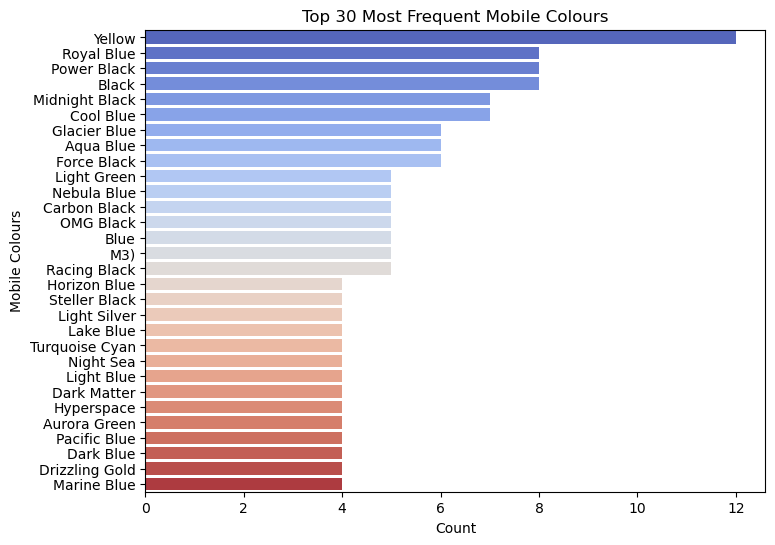

In [284]:
top_models = df["Colour"].value_counts().nlargest(30)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_models.index, x=top_models.values, palette="coolwarm")
plt.ylabel("Mobile Colours") 
plt.xlabel("Count") 
plt.title("Top 30 Most Frequent Mobile Colours")
plt.show()

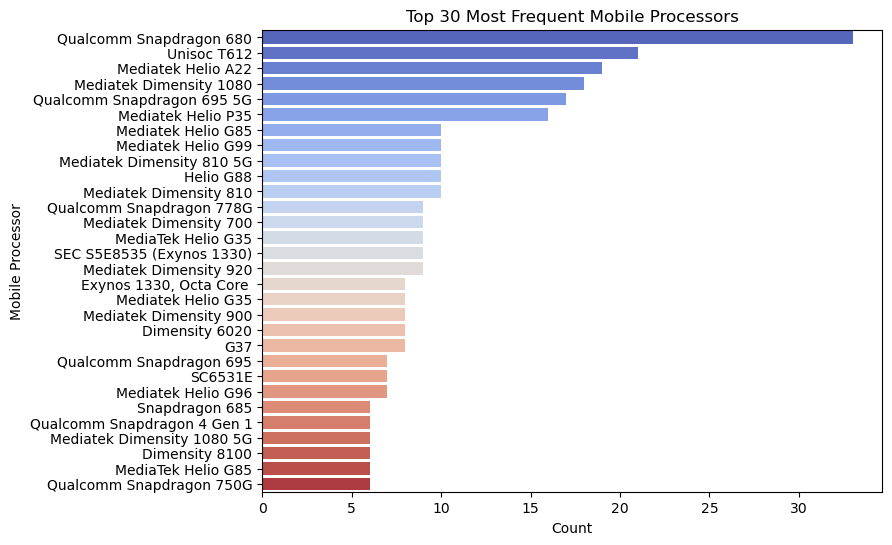

In [285]:
top_models = df["Processor_"].value_counts().nlargest(30)
plt.figure(figsize=(8, 6))  
sns.barplot(y=top_models.index, x=top_models.values, palette="coolwarm")
plt.ylabel("Mobile Processor") 
plt.xlabel("Count")  
plt.title("Top 30 Most Frequent Mobile Processors")
plt.show()

<Axes: xlabel='Rear Camera'>

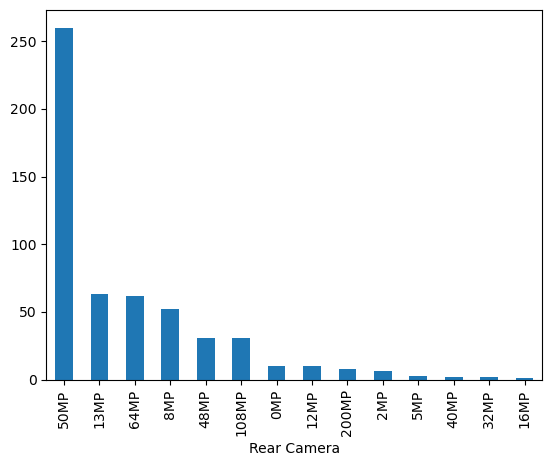

In [286]:
df['Rear Camera'].value_counts().plot(kind='bar')

<Axes: xlabel='Front Camera'>

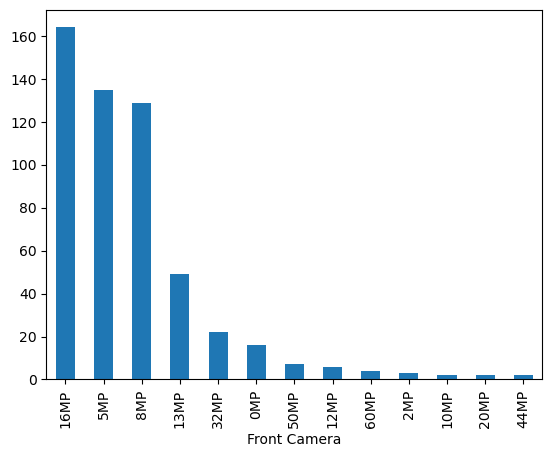

In [287]:
df['Front Camera'].value_counts().plot(kind='bar')

#### This graph shows that as megapixel of front camera increase the sell of the mobile phone decreases because the price of mobile phone increases.

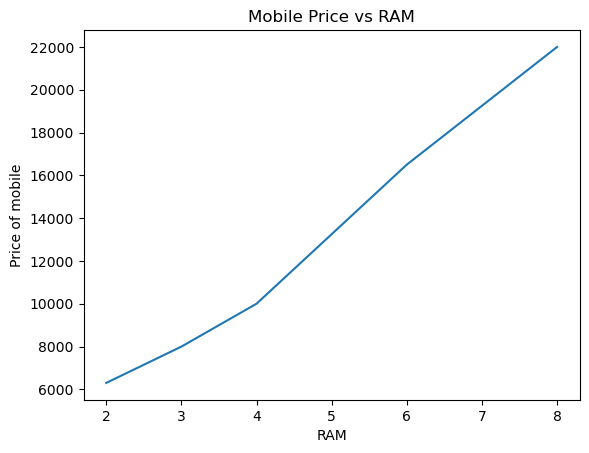

In [289]:
df.groupby('RAM')['Prize'].median().plot()
plt.xlabel('RAM')
plt.ylabel('Price of mobile')
plt.title("Mobile Price vs RAM")
plt.show()

#### This graph shows that as RAM increases the Price of Mobile Phone also increases

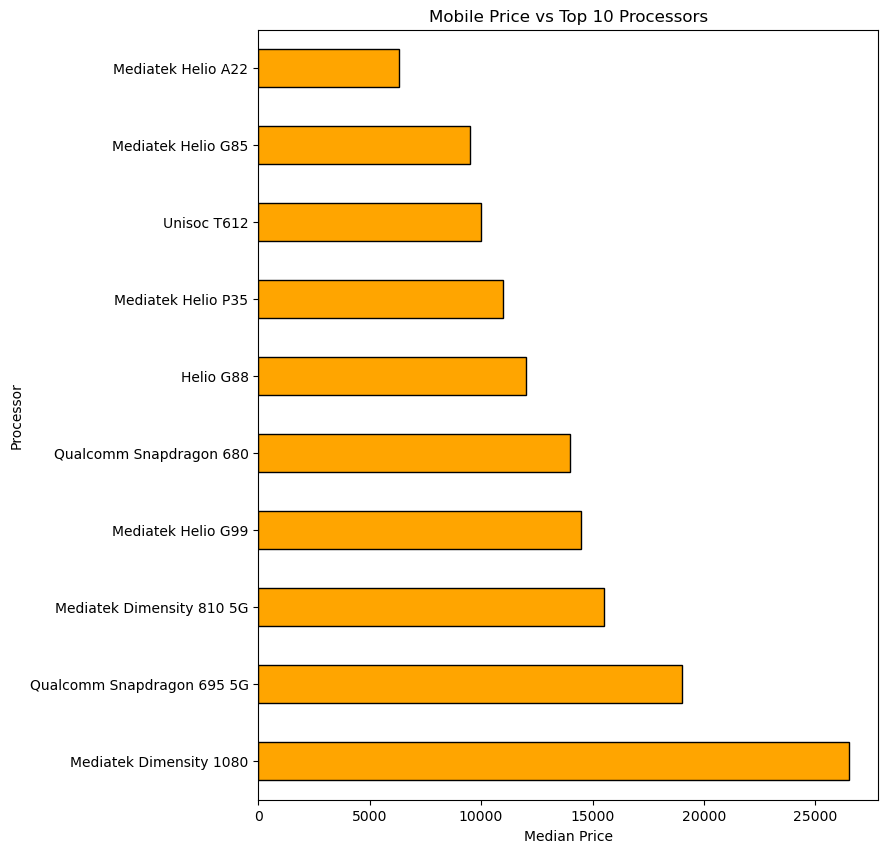

In [291]:
top_processors = df["Processor_"].value_counts().nlargest(10).index
filtered_df = df[df["Processor_"].isin(top_processors)]
median_prices = filtered_df.groupby("Processor_")["Prize"].median()
plt.figure(figsize=(8, 10))  
median_prices.sort_values().plot(kind="barh", color='Orange', edgecolor="black")
plt.ylabel("Processor") 
plt.xlabel("Median Price")
plt.title("Mobile Price vs Top 10 Processors")
plt.gca().invert_yaxis() 
plt.show()

#### This graph shows the top 10 processor and out of these processor the price of Mediatek Dimensity 1080 is more than 25000

## Finding Outliers

In [294]:
numerical_column = df.select_dtypes(include=['number']).columns
for i in numerical_column:
    Q1 = df[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    Q2 = df[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    Q3 = df[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    IQR = Q3 - Q1
    print("The interquartile range for the column", i, "is given by", IQR)
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    n = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    df[i] = np.where((df[i] < LL) | (df[i] > UL), df[i].mean(), df[i])
    m = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    print("   ")
    print("   ")

The first quantile for the column Memory is given by 64.0
The second quantile for the column Memory is given by 128.0
The third quantile for the column Memory is given by 128.0
The interquartile range for the column Memory is given by 64.0
The lower limit for the column Memory is given by -32.0
The upper limit for the column Memory is given by 224.0
The number of outliers for column Memory is given by 55
The number of outliers after imputation for column Memory is given by 0
   
   
The first quantile for the column RAM is given by 4.0
The second quantile for the column RAM is given by 6.0
The third quantile for the column RAM is given by 8.0
The interquartile range for the column RAM is given by 4.0
The lower limit for the column RAM is given by -2.0
The upper limit for the column RAM is given by 14.0
The number of outliers for column RAM is given by 0
The number of outliers after imputation for column RAM is given by 0
   
   
The first quantile for the column Battery_ is given by 50

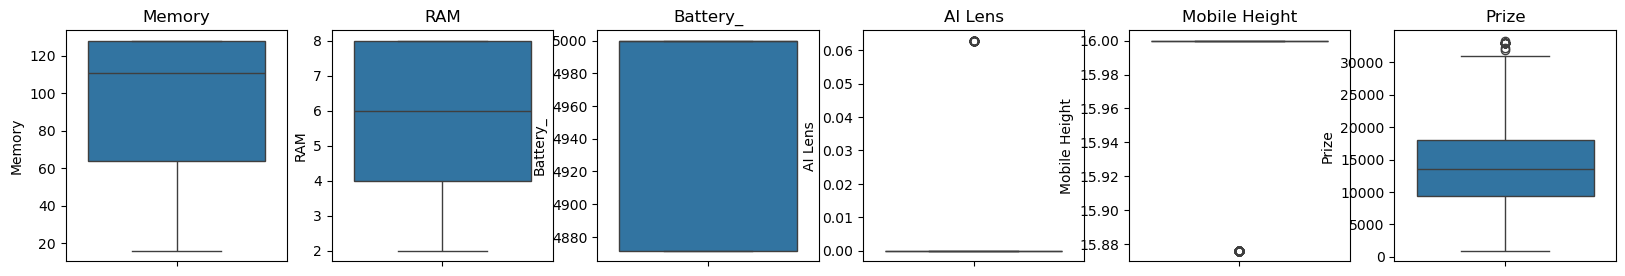

In [295]:
numerical = df.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

## Removing Outliers

In [297]:
from scipy.stats.mstats import winsorize
outlier_columns = ['Prize',]
def winsorize_outliers(df, columns, limit=0.05):
    df_clean = df.copy()
    for col in columns:
        df_clean[col] = winsorize(df_clean[col], limits=[limit, limit])
    return df_clean
df_clean = winsorize_outliers(df, outlier_columns)
print(df_clean[outlier_columns].describe())

              Prize
count    541.000000
mean   14708.444327
std     6723.462301
min     5999.000000
25%     9290.000000
50%    13499.000000
75%    17999.000000
max    29999.000000


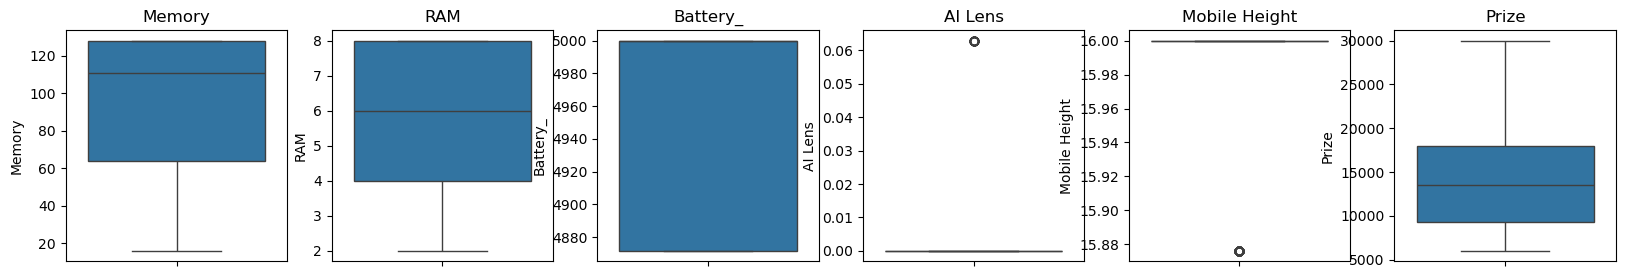

In [298]:
numerical = df_clean.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)

## Skewness

In [300]:
# list of numerical columns whose data type is not object'o'
num_column=df.select_dtypes(include=['float64','int64','int32']).columns

skewness = df[num_column].skew()

# Print skewness for each numerical column
print(skewness)

Memory          -0.519820
RAM              0.067617
Battery_        -0.977369
AI Lens          3.612638
Mobile Height   -1.422606
Prize            0.744972
dtype: float64


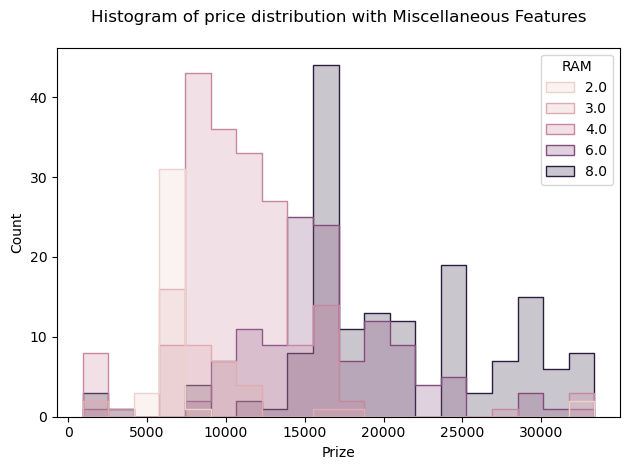

In [301]:
sns.histplot(data=df,x='Prize', bins = 20,hue = 'RAM',element='step')
plt.title('Histogram of price distribution with Miscellaneous Features\n')
plt.tight_layout()
plt.show()

## Key Insights from the Histogram:

### 1.Price Distribution

#### **The majority of mobile phones are priced between ₹5,000 to ₹20,000, with fewer models beyond ₹25,000.**
#### **The distribution is right-skewed, meaning most phones are in the mid-to-low price range, while high-end models are less frequent.**

### 2.Impact of RAM on Price

#### **Lower RAM models (2GB, 3GB, 4GB) are more frequent in the lower price range (₹5,000 - ₹15,000).**
#### **Higher RAM models (6GB, 8GB) are more concentrated in the premium price segment (₹15,000 - ₹30,000+).**
#### **The presence of high-RAM devices in lower price ranges is minimal, suggesting RAM is a key factor in determining price.**

### 3.Clustering of Prices

### **There are distinct peaks, indicating certain price points where most models are available.**
### **The highest count is seen around ₹10,000 - ₹15,000, likely representing budget and mid-range smartphones.**

### Conclusion:
#### ✅**RAM strongly influences price—higher RAM models are priced higher.**
#### ✅ **Most phones are within the affordable to mid-range segment (₹5,000 - ₹20,000).**
#### ✅ **The price distribution is skewed, with fewer high-end models available.**

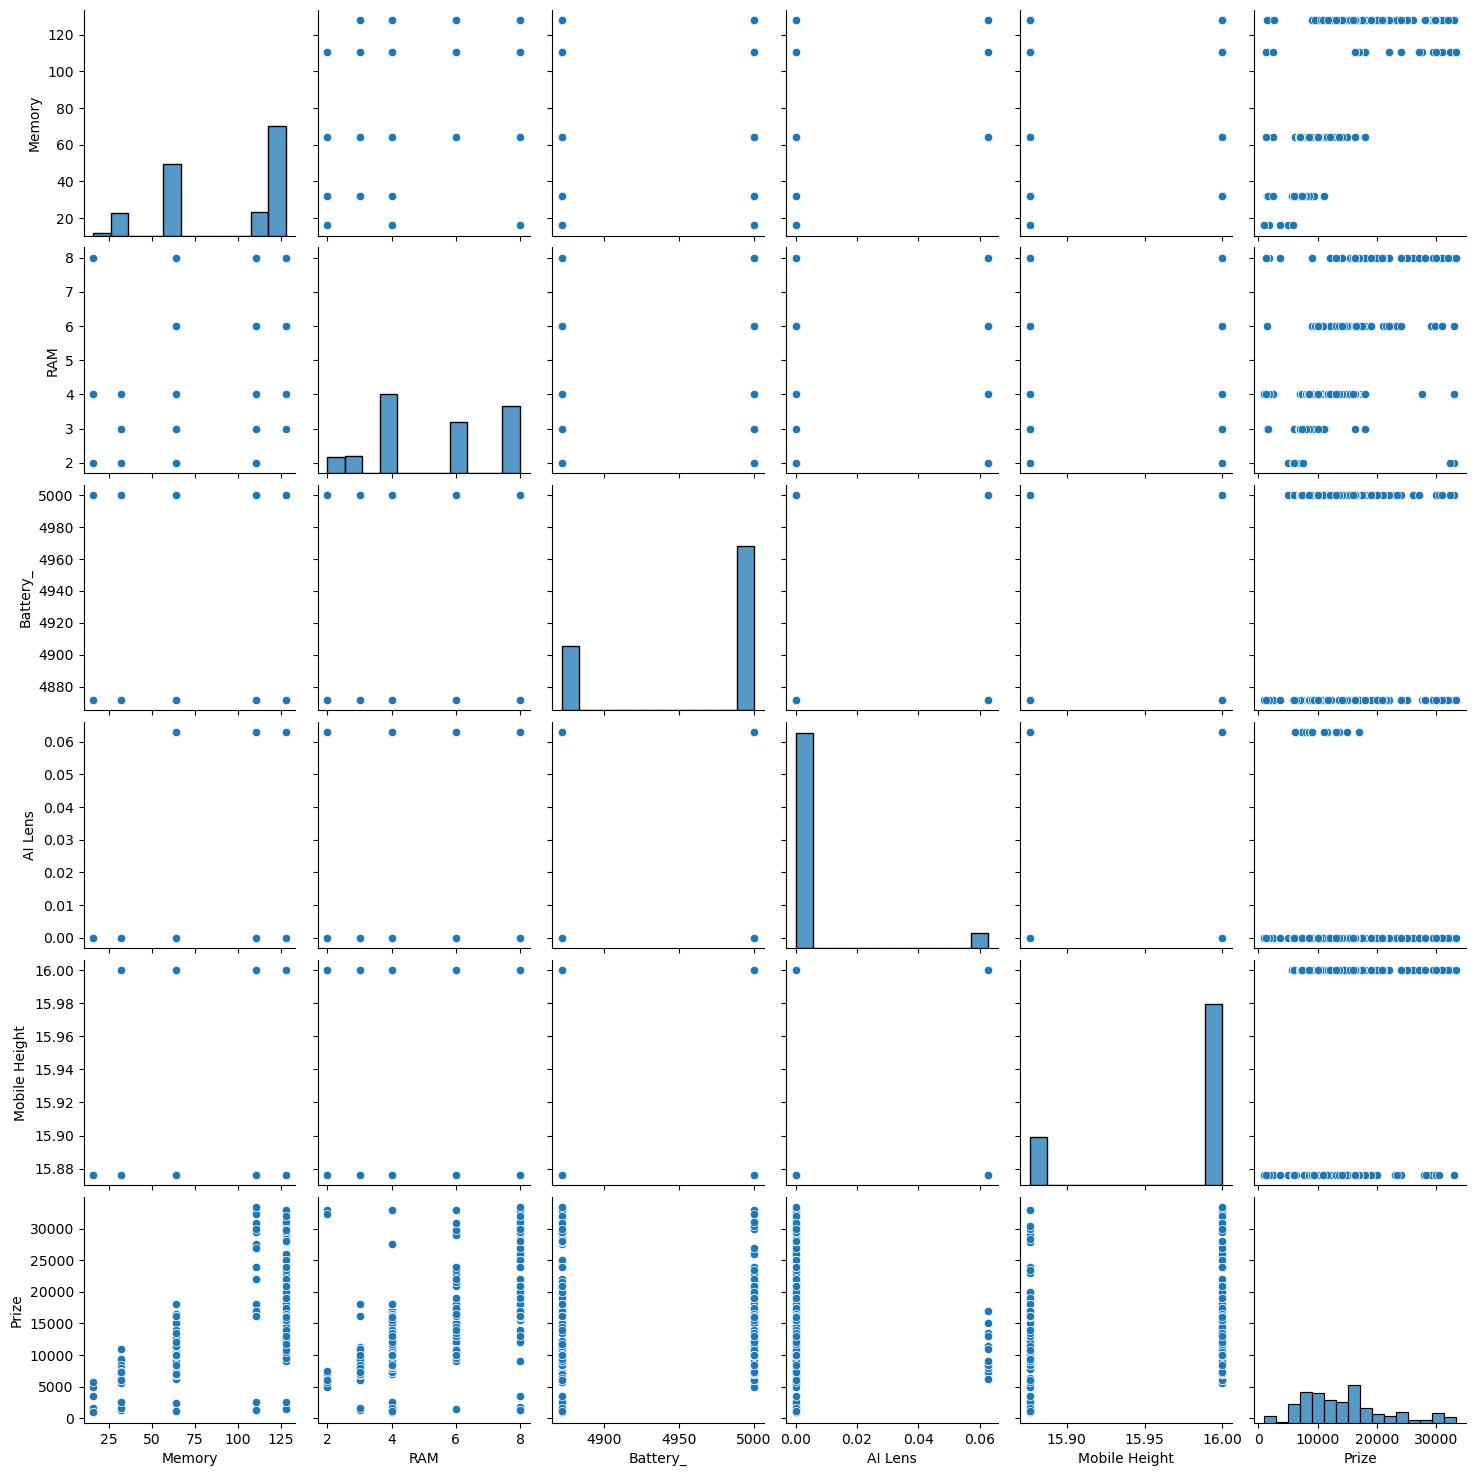

<Figure size 640x480 with 0 Axes>

In [303]:
sns.pairplot(df[['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize']])
plt.show()
plt.suptitle('Pairplot: Relationships Between Features and Mobile Prices', y=1.02)
plt.show()

                 Memory       RAM  Battery_   AI Lens  Mobile Height     Prize
Memory         1.000000  0.727123 -0.123574 -0.113998       0.016747  0.626814
RAM            0.727123  1.000000 -0.171280 -0.082622      -0.106724  0.657876
Battery_      -0.123574 -0.171280  1.000000 -0.024526       0.292139 -0.180244
AI Lens       -0.113998 -0.082622 -0.024526  1.000000      -0.127661 -0.175875
Mobile Height  0.016747 -0.106724  0.292139 -0.127661       1.000000  0.094997
Prize          0.626814  0.657876 -0.180244 -0.175875       0.094997  1.000000


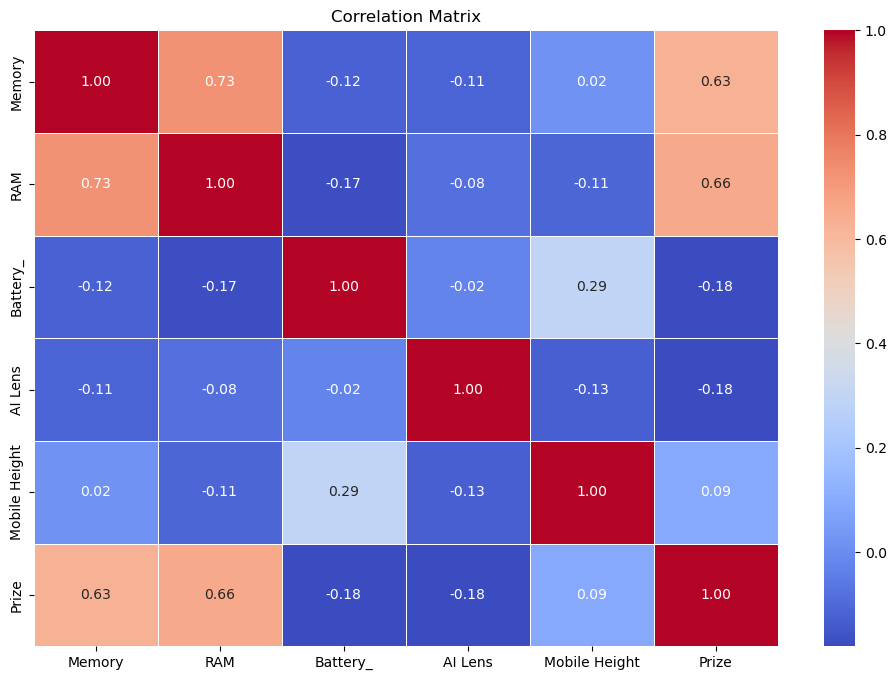

In [304]:
numerical_df = df.select_dtypes(include=['number'])  # Keeps only numeric columns

# Compute correlation matrix
corr = numerical_df.corr()

# Display correlation values
print(corr)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

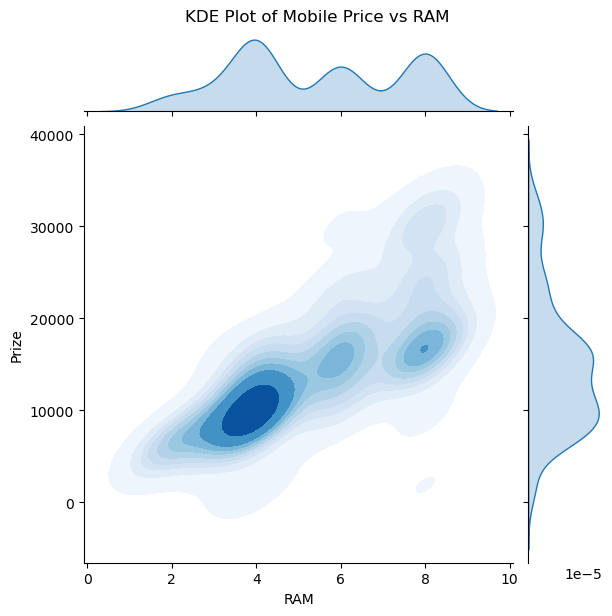

In [305]:
sns.jointplot(x='RAM', y='Prize', data=df, kind='kde', fill=True, cmap='Blues')

# Set the title for the plot
plt.suptitle('KDE Plot of Mobile Price vs RAM', y=1.02)
plt.show()


## Key Insights from the KDE Plot (RAM vs Mobile Price)

#### **1.Positive Correlation Between RAM and Price**
##### **The KDE plot shows that as RAM increases, the mobile price also tends to increase.**
##### **This suggests that higher RAM models are generally priced higher.**

#### **2.High-Density Region**
##### **The darkest region (highest density) is around 2GB to 4GB RAM and price between 5,000 to 15,000.**
##### **This indicates that most mobile phones fall within this range, making it the most common segment in the dataset.**

#### **3.Less Density in Higher RAM & Price**
##### **As RAM increases beyond 6GB-8GB, the distribution spreads out, meaning fewer phones have very high RAM and those that do are priced higher.However, the density is lower for very high-end devices, suggesting that flagship models (high RAM & price) are less frequent.**

#### **4.Price Variability at Lower RAM**
##### **At lower RAM values (0GB - 2GB), the price distribution spreads widely, meaning there are both budget and slightly expensive models in this category.This suggests that other features (brand, processor, etc.) might also play a role in determining price at lower RAM levels.**

Text(0.5, 1.0, 'Memory Distribution')

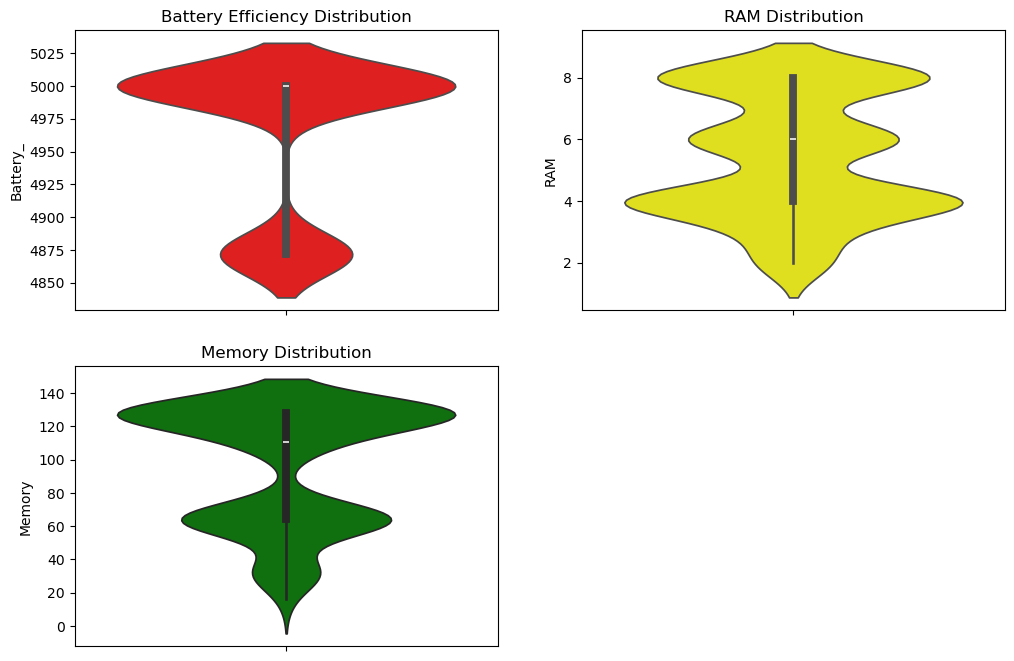

In [307]:
plt.figure(figsize=(12, 8))

# Violin Plot: Battery Efficiency
plt.subplot(2, 2, 1)
sns.violinplot(y=df['Battery_'], color='red')
plt.title('Battery Efficiency Distribution')

# Violin Plot: RAM
plt.subplot(2, 2, 2)
sns.violinplot(y=df['RAM'], color='yellow')
plt.title('RAM Distribution')

# Violin Plot: Price Per RAM
plt.subplot(2, 2, 3)
sns.violinplot(y=df['Memory'], color='green')
plt.title('Memory Distribution')


## Key Insights from the Violin Plots

#### **1. Battery Efficiency Distribution (Red)**
##### **The distribution appears bimodal (two peaks), indicating two common ranges of battery efficiency.**
##### **The middle part is relatively narrow, meaning most values cluster around a certain range.**
##### **There are some outliers at the lower end, suggesting a few mobile phones with significantly lower battery efficiency.**

#### **2. RAM Distribution (Yellow)**
##### **The plot is multi-modal, meaning there are distinct groups of RAM capacities.**
##### **The wider sections indicate more common RAM values (e.g., 4GB, 6GB, 8GB).**
##### **The lower part of the violin is narrow, meaning fewer low-RAM devices in the dataset.**

#### **3. Memory Distribution (Green)**
##### **The plot has two distinct peaks, indicating that mobile phones tend to have two common memory capacity ranges (possibly lower-end and higher-end models).**
##### **This suggests that most phones either have low or high memory, with fewer in the middle range.**

In [309]:
df['Rear_Camera_MP'] = df['Rear Camera'].str.replace('MP', '').astype(int)
df['Front_Camera_MP'] = df['Front Camera'].str.replace('MP', '').astype(int)
print(df[['Rear Camera', 'Front Camera', 'RAM']])

    Rear Camera Front Camera  RAM
0          13MP          5MP  4.0
1          13MP          5MP  4.0
2          50MP         16MP  8.0
3           8MP          5MP  2.0
4          50MP          5MP  8.0
..          ...          ...  ...
536        50MP         12MP  8.0
537         5MP          2MP  2.0
538        50MP          8MP  4.0
539        50MP         32MP  8.0
540        50MP          8MP  4.0

[541 rows x 3 columns]


## Feature Engineering

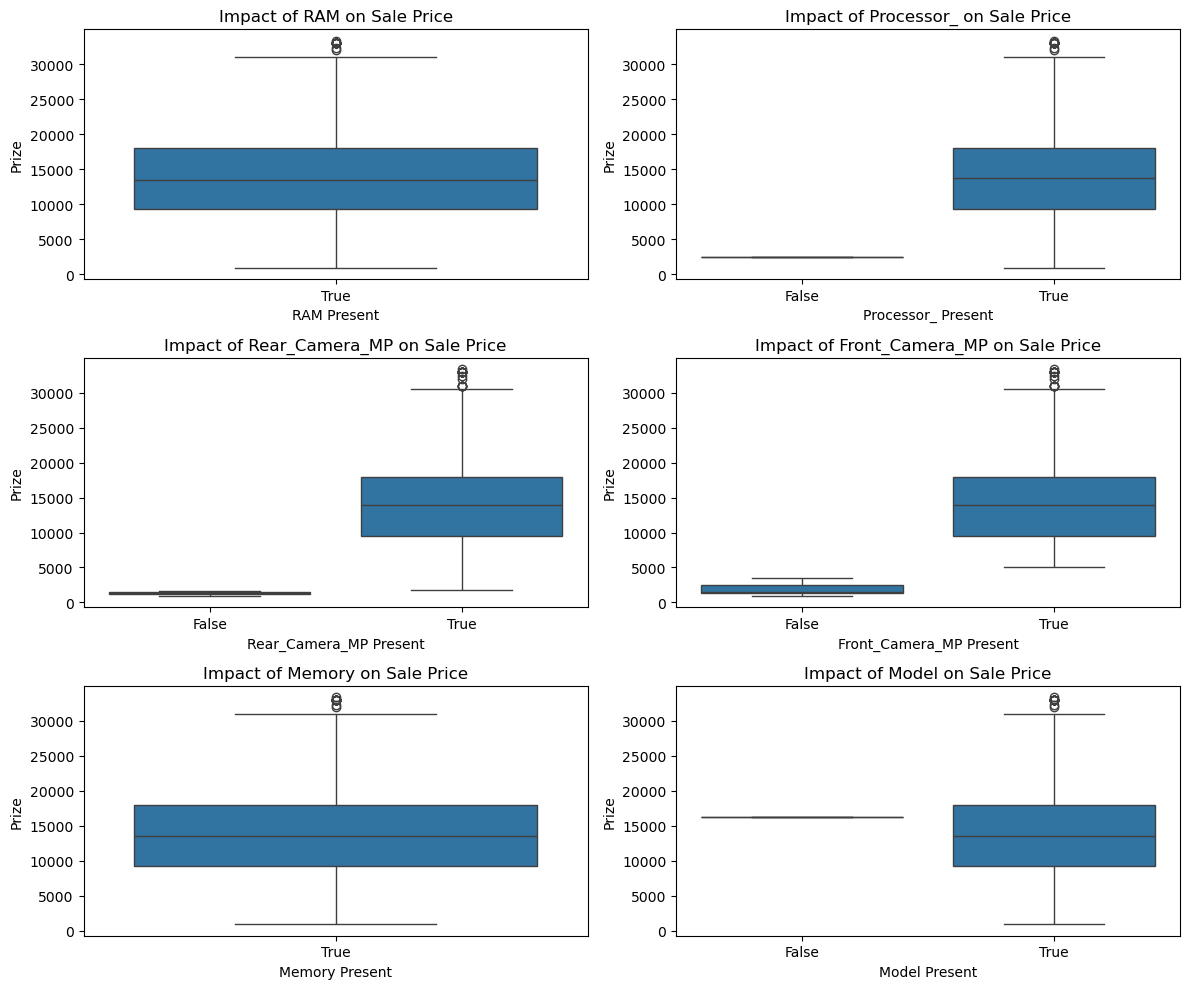

In [387]:
# Selecting key Features to analyze their impact on Mobile prices
Features = ["RAM", "Processor_", "Rear_Camera_MP", "Front_Camera_MP","Memory","Model"]

# Create subplots for visualizing the effect of features
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for ax, Features in zip(axes.flatten(), Features):
    sns.boxplot(x=df[Features] > 0, y=df["Prize"], ax=ax)
    ax.set_xlabel(f"{Features} Present")
    ax.set_ylabel("Prize")
    ax.set_title(f"Impact of {Features} on Sale Price")

plt.tight_layout()
plt.show()


### Key Insights from the Boxplots:

#### **1.RAM Presence vs. Price:**

##### **Phones with RAM tend to have a higher median price than those without.**
##### **The price distribution is wider, indicating greater variation in high-end models.**

#### **Processor Presence vs. Price:**

##### **The presence of a processor correlates with a higher price range.**
##### **Some outliers suggest premium models with expensive processors.**

#### **Rear Camera MP vs. Price:**

##### **Phones with rear cameras tend to be more expensive, but there are also budget models with cameras.**
##### **Outliers indicate flagship models with high camera quality driving up prices.**

#### **Front Camera MP vs. Price:**

##### **Similar to rear cameras, but the price impact seems slightly less pronounced.**
##### **This suggests that rear cameras play a bigger role in price differentiation than front cameras.**

#### **Memory Presence vs. Price:**

##### **Devices with more memory generally have higher prices.**
##### **However, some low-memory budget devices are still present.**

#### **Model Presence vs. Price:**

##### **Certain models have a wide price range, suggesting variability in specs within a model lineup.**
##### **There are outliers, likely representing flagship or premium models.**

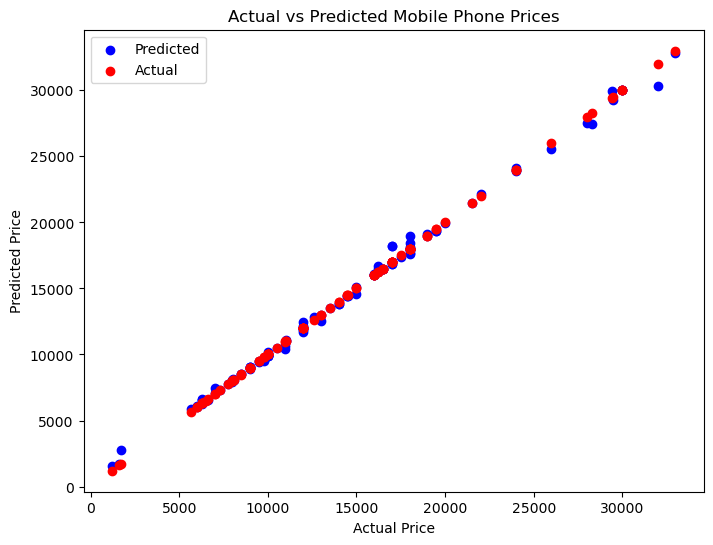

In [389]:
##Model Evaluation
##Step 5.1: Evaluating Model Performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Actual vs Predicted Mobile Phone Prices')
plt.show()